In [1]:
from datetime import datetime

In [2]:
dt = datetime(2023, 11, 22, 15, 30, 45)
dt

datetime.datetime(2023, 11, 22, 15, 30, 45)

In [3]:
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

2023 11 22 15 30 45


In [4]:
cur = datetime.now()
cur

datetime.datetime(2023, 12, 22, 15, 9, 42, 951475)

# DatetimeIndex 인덱스 
DatetimeIndex는 특정한 순간에 기록된 타임스탬프(timestamp) 형식의 시계열 자료를 다루기 위한 인덱스 
 
- pd.to_datetime 함수 
 
날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성
 
- pd.date_range 함수 

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [10]:
import pandas as pd 
import numpy as np 

In [11]:
date_str = ["2023, 1, 1", "2023, 1, 4", "2023, 1, 5", "2023, 1, 6"]
idx = pd.to_datetime(date_str) 
idx

DatetimeIndex(['2023-01-01', '2023-01-04', '2023-01-05', '2023-01-06'], dtype='datetime64[ns]', freq=None)

In [12]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx) # 정규분포를 이루는 실수 값
s

2023-01-01    1.764052
2023-01-04    0.400157
2023-01-05    0.978738
2023-01-06    2.240893
dtype: float64

In [13]:
s.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4 entries, 2023-01-01 to 2023-01-06
Series name: None
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


In [14]:
data ={'2023년11월19일':[10,20,30],
       '2023년11월20일':[40,50,60],
       '2023년11월21일':[70,80,90],
       '2023년11월22일':[100,120,130]}

In [15]:
df = pd.DataFrame(data)
df 

,2023년11월19일,2023년11월20일,2023년11월21일,2023년11월22일
0,10,40,70,100
1,20,50,80,120
2,30,60,90,130


In [16]:
df = df.T # 행 인덱스 만들기
df

,0,1,2
2023년11월19일,10,20,30
2023년11월20일,40,50,60
2023년11월21일,70,80,90
2023년11월22일,100,120,130


In [17]:
df.index, type(df.index[0]) # 시계열 연산이 안됨

(Index(['2023년11월19일', '2023년11월20일', '2023년11월21일', '2023년11월22일'], dtype='object'),
 str)

In [18]:
# 인덱스만 date타입으로 변경 
df.index  = pd.to_datetime(df.index, format='%Y년%m월%d일')  # 포멧 지정해줘야함

In [19]:
df.index

DatetimeIndex(['2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22'], dtype='datetime64[ns]', freq=None)

In [22]:
data2 ={'2023년11월19일':[10,20,30],
       '2023년11월20일':[40,50,60],
       '2023년11월21일':[70,80,90],
       '2023년11월22일':[100,120,130]}

In [23]:
df = pd.DataFrame(data2)
df 

,2023년11월19일,2023년11월20일,2023년11월21일,2023년11월22일
0,10,40,70,100
1,20,50,80,120
2,30,60,90,130


In [25]:
df = df.T
df

,0,1,2
2023년11월19일,10,20,30
2023년11월20일,40,50,60
2023년11월21일,70,80,90
2023년11월22일,100,120,130


In [26]:
df.index, type(df.index[0])

(Index(['2023년11월19일', '2023년11월20일', '2023년11월21일', '2023년11월22일'], dtype='object'),
 str)

In [28]:
df.index  = pd.to_datetime(df.index, format='mixed') 
df.index

DateParseError: Unknown datetime string format, unable to parse: 2023년11월19일, at position 0

In [30]:
pd.date_range("2023-11-1", "2023-11-30") # 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04',
               '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10', '2023-11-11', '2023-11-12',
               '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-18', '2023-11-19', '2023-11-20',
               '2023-11-21', '2023-11-22', '2023-11-23', '2023-11-24',
               '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28',
               '2023-11-29', '2023-11-30'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range(start="2023-11-1", periods=10)

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04',
               '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range(start="2023-12-4", periods=100)

DatetimeIndex(['2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11',
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-16', '2023-12-17', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31',
               '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
      

# freq 인수로 특정한 날짜만 생성 
- s: 초
- T: 분
- H: 시간
- D: 일(day)
- B: 주말이 아닌 평일
- W: 주(일요일)
- W-MON: 주(월요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날

In [37]:
pd.date_range("2023-11-1", "2023-11-30", freq="B") # 평일만

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-23', '2023-11-24', '2023-11-27', '2023-11-28',
               '2023-11-29', '2023-11-30'],
              dtype='datetime64[ns]', freq='B')

In [38]:
pd.date_range("2023-11-1", "2023-11-30", freq="W")

DatetimeIndex(['2023-11-05', '2023-11-12', '2023-11-19', '2023-11-26'], dtype='datetime64[ns]', freq='W-SUN')

In [39]:
pd.date_range("2023-11-1", "2023-11-30", freq="BMS")

DatetimeIndex(['2023-11-01'], dtype='datetime64[ns]', freq='BMS')

In [40]:
pd.date_range("2023-11-1", "2023-11-30", freq="WOM-2THU")

DatetimeIndex(['2023-11-09'], dtype='datetime64[ns]', freq='WOM-2THU')

# shift 연산 
인덱스는 그대로 두고 데이터만 이동 가능 

In [42]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2018-1-1", periods=4, freq="M"))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [43]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [44]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

In [45]:
ts.shift(1, freq="M")

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [46]:
ts.shift(1, freq="W")

2018-02-04    1.764052
2018-03-04    0.400157
2018-04-01    0.978738
2018-05-06    2.240893
dtype: float64

# resample 연산 
- 시간 구간이 작아지면 데이터 양이 증가 : 업-샘플링(up-sampling) 
- 시간 구간이 커지면 데이터 양이 감소 : 다운-샘플링(down-sampling)

In [48]:
ts = pd.Series(np.random.randn(100), index=pd.date_range("2018-1-1", periods=100, freq="D"))
ts.tail(20)

2018-03-22    1.488252
2018-03-23    1.895889
2018-03-24    1.178780
2018-03-25   -0.179925
2018-03-26   -1.070753
2018-03-27    1.054452
2018-03-28   -0.403177
2018-03-29    1.222445
2018-03-30    0.208275
2018-03-31    0.976639
2018-04-01    0.356366
2018-04-02    0.706573
2018-04-03    0.010500
2018-04-04    1.785870
2018-04-05    0.126912
2018-04-06    0.401989
2018-04-07    1.883151
2018-04-08   -1.347759
2018-04-09   -1.270485
2018-04-10    0.969397
Freq: D, dtype: float64

In [50]:
ts.resample('W').mean() # 다운-샘플링의 경우, 그룹 연산을 해서 대표값을 구해야 함

2018-01-07    0.305776
2018-01-14    0.629064
2018-01-21   -0.006910
2018-01-28    0.277065
2018-02-04   -0.144972
2018-02-11   -0.496299
2018-02-18   -0.474473
2018-02-25   -0.201222
2018-03-04   -0.775142
2018-03-11    0.052868
2018-03-18   -0.450379
2018-03-25    0.601892
2018-04-01    0.334893
2018-04-08    0.509605
2018-04-15   -0.150544
Freq: W-SUN, dtype: float64

In [51]:
ts = pd.Series(np.random.randn(60), index=pd.date_range(
    "2018-1-1", periods=60, freq="T"))
ts.head(20)

2018-01-01 00:00:00   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:09:00    1.910065
2018-01-01 00:10:00   -0.268003
2018-01-01 00:11:00    0.802456
2018-01-01 00:12:00    0.947252
2018-01-01 00:13:00   -0.155010
2018-01-01 00:14:00    0.614079
2018-01-01 00:15:00    0.922207
2018-01-01 00:16:00    0.376426
2018-01-01 00:17:00   -1.099401
2018-01-01 00:18:00    0.298238
2018-01-01 00:19:00    1.326386
Freq: T, dtype: float64

In [52]:
ts.resample?

In [53]:
ts.resample('10T').sum()

2018-01-01 00:00:00    6.835324
2018-01-01 00:10:00    3.764630
2018-01-01 00:20:00    0.776495
2018-01-01 00:30:00   -0.538336
2018-01-01 00:40:00    1.828234
2018-01-01 00:50:00    0.167957
Freq: 10T, dtype: float64

In [54]:
ts.resample('5T').ohlc() # ohlc 메서드는 구간의 시고저종(open, high, low, close)값을 구함

,open,high,low,close
2018-01-01 00:00:00,-1.173123,1.943621,-1.173123,1.922942
2018-01-01 00:05:00,1.480515,1.910065,-0.861226,1.910065
2018-01-01 00:10:00,-0.268003,0.947252,-0.268003,0.614079
2018-01-01 00:15:00,0.922207,1.326386,-1.099401,1.326386
2018-01-01 00:20:00,-0.694568,1.849264,-0.694568,0.672295
2018-01-01 00:25:00,0.407462,0.539249,-0.769916,0.031831
2018-01-01 00:30:00,-0.635846,0.676433,-0.635846,0.396007
2018-01-01 00:35:00,-1.093062,0.635031,-1.491258,0.635031
2018-01-01 00:40:00,2.383145,2.383145,-1.315907,-1.315907
2018-01-01 00:45:00,-0.461585,1.713343,-0.826439,-0.826439


In [ ]:
# 업-샘플링의 경우 실제로 존재하지 않는 데이터를 만들어야 함(위험)

In [55]:
ts.resample('30s').ffill().head(20) # 데이터를 뒤에서 그대로 씀 / 강제로 늘릴 경우 / 결측치 처리할 때

2018-01-01 00:00:00   -1.173123
2018-01-01 00:00:30   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:01:30    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:02:30   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:03:30   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:04:30    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:05:30    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:06:30    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:07:30    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:08:30   -0.861226
2018-01-01 00:09:00    1.910065
2018-01-01 00:09:30    1.910065
Freq: 30S, dtype: float64

In [56]:
ts.resample('30s').bfill().head(20) # 데이터를 앞에서 미리 씀

2018-01-01 00:00:00   -1.173123
2018-01-01 00:00:30    1.943621
2018-01-01 00:01:00    1.943621
2018-01-01 00:01:30   -0.413619
2018-01-01 00:02:00   -0.413619
2018-01-01 00:02:30   -0.747455
2018-01-01 00:03:00   -0.747455
2018-01-01 00:03:30    1.922942
2018-01-01 00:04:00    1.922942
2018-01-01 00:04:30    1.480515
2018-01-01 00:05:00    1.480515
2018-01-01 00:05:30    1.867559
2018-01-01 00:06:00    1.867559
2018-01-01 00:06:30    0.906045
2018-01-01 00:07:00    0.906045
2018-01-01 00:07:30   -0.861226
2018-01-01 00:08:00   -0.861226
2018-01-01 00:08:30    1.910065
2018-01-01 00:09:00    1.910065
2018-01-01 00:09:30   -0.268003
Freq: 30S, dtype: float64

# dt 접근자

In [62]:
s = pd.Series(pd.date_range("2023-12-25", periods=100, freq="D"))
s

0    2023-12-25
1    2023-12-26
2    2023-12-27
3    2023-12-28
4    2023-12-29
        ...    
95   2024-03-29
96   2024-03-30
97   2024-03-31
98   2024-04-01
99   2024-04-02
Length: 100, dtype: datetime64[ns]

In [63]:
s.dt.year

0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2024
96    2024
97    2024
98    2024
99    2024
Length: 100, dtype: int32

In [64]:
s.dt.weekday

0     0
1     1
2     2
3     3
4     4
     ..
95    4
96    5
97    6
98    0
99    1
Length: 100, dtype: int32

In [65]:
s.dt.strftime("%Y년 %m월 %d일")

0     2023년 12월 25일
1     2023년 12월 26일
2     2023년 12월 27일
3     2023년 12월 28일
4     2023년 12월 29일
          ...      
95    2024년 03월 29일
96    2024년 03월 30일
97    2024년 03월 31일
98    2024년 04월 01일
99    2024년 04월 02일
Length: 100, dtype: object

# 연습문제

다음 명령으로 만들어진 데이터프레임에 대해 월별 value의 합계를 구하라.
(힌트: `groupby` 메서드와 `dt` 접근자를 사용하라)

```
np.random.seed(0)
df = pd.DataFrame({
    "date": pd.date_range("2020-12-25", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))
})

In [67]:
np.random.seed(0)
df = pd.DataFrame({
    "date": pd.date_range("2020-12-25", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))
})

In [69]:
df['월별 합계']=df['date'].dt.month

In [71]:
df.groupby('월별 합계')['value'].sum()

월별 합계
1     1811
2      985
3     1500
4      146
12     381
Name: value, dtype: int32

# 주식 데이터로 연습하기

In [109]:
!pip install pandas_datareader
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --- ------------------------------------ 0.3/2.9 MB 8.9 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/2.9 MB 6.4 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/2.9 MB 6.9 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/2.9 MB 6.2 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/2.9 MB 5.9 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/2.9 MB 5.5 MB/s eta 0:00:01
     --------------------- ---------------

In [111]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# 한글 및 특정 문자 깨짐 문제 해결
import koreanize_matplotlib # 시본의 한글 깨짐은 해결못하지만, - 깨짐 해결
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)


ModuleNotFoundError: No module named 'koreanize_matplotlib'

In [112]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [113]:
data.get_data_yahoo?

Object `data.get_data_yahoo` not found.


In [114]:
sdf = data.get_data_yahoo('005930.KS') # 삼성전자 KOSPI 지수, 끝을 생략하는 오늘까지 가져옴
sdf

AttributeError: 'dict' object has no attribute 'get_data_yahoo'

In [115]:
sdf.index

NameError: name 'sdf' is not defined

In [116]:
plt.plot(sdf['Close'])
plt.show()

NameError: name 'sdf' is not defined

In [81]:
# 이동 평균(Move Average

In [82]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1, columns=['A', 'B'] )

df.index=['2023-01-01','2023-02-01','2023-03-01','2023-04-01',
          '2023-05-01','2023-06-01','2023-07-01','2023-08-01']
df

,A,B
2023-01-01,1,2
2023-02-01,3,4
2023-03-01,5,8
2023-04-01,7,6
2023-05-01,9,12
2023-06-01,11,10
2023-07-01,13,16
2023-08-01,15,20


In [83]:
#rolling 객체의 멤버함수 mean, sum, max, min
df.rolling(window=2).mean() 
# 1행값 nan, 2행값 = 2행 - 1행 ...

,A,B
2023-01-01,NaN,NaN
2023-02-01,2.0,3.0
2023-03-01,4.0,6.0
2023-04-01,6.0,7.0
2023-05-01,8.0,9.0
2023-06-01,10.0,11.0
2023-07-01,12.0,13.0
2023-08-01,14.0,18.0


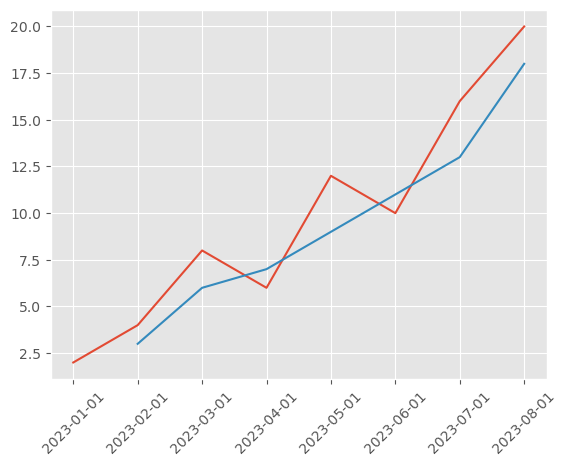

In [84]:
plt.xticks(rotation=45)
plt.plot(df.index, df['B'])
plt.plot(df.index, df['B'].rolling(window=2).mean())
plt.show()

In [89]:
# 시계열데이터 인덱싱 슬라이싱

In [90]:
sdf.index

NameError: name 'sdf' is not defined

In [93]:
sdf.loc['2023']

NameError: name 'sdf' is not defined

In [94]:
sdf.loc['2020':'2023']

NameError: name 'sdf' is not defined

In [95]:
sdf.loc['2020-01-01':'2022-12-31']

NameError: name 'sdf' is not defined

In [96]:
sdf['year'] = sdf.index.year
sdf

NameError: name 'sdf' is not defined

# 시계열 데이터의 통계(집계)

In [98]:
round(sdf.groupby('year').mean()) 

NameError: name 'sdf' is not defined

In [99]:
round(sdf.groupby(sdf.index.year).mean())

NameError: name 'sdf' is not defined

In [100]:
sdf.groupby([sdf.index.year, sdf.index.month]).mean()

NameError: name 'sdf' is not defined

# 연습문제 : 교통사고 데이터 분석

In [106]:
data_2014 = pd.read_csv('data/2014년 졸음운전 교통사고.csv', encoding='ANSI', index_col='구분')
data_2015 = pd.read_csv('data/2015년 졸음운전 교통사고.csv', encoding='ANSI', index_col='구분')
data_2016 = pd.read_csv('data/2016년 졸음운전 교통사고.csv', encoding='ANSI', index_col='구분')
data_2014.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/2014년 졸음운전 교통사고.csv'